# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

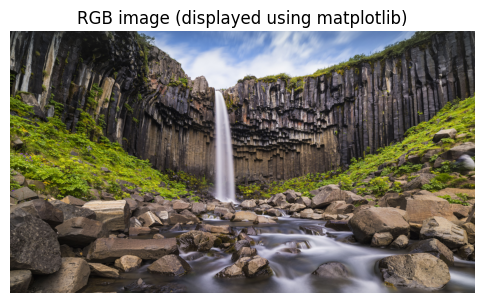

Array shapes:
  RGB image shape: (2160, 3840, 3)
  Manual grayscale shape: (2160, 3840)
  cv2.cvtColor grayscale shape: (2160, 3840)

Sample pixel values (format: (row,col)):
  Pixel (0,0): RGB=(36, 37, 39) | manual_gray=36 | cv2_gray=37
  Pixel (1080,1920): RGB=(101, 85, 70) | manual_gray=88 | cv2_gray=88
  Pixel (2159,3839): RGB=(58, 58, 58) | manual_gray=58 | cv2_gray=58

Difference stats (manual_gray - cv2_gray):
  min difference: 0.0
  max difference: 1.0
  mean difference: 0.47024763695987654


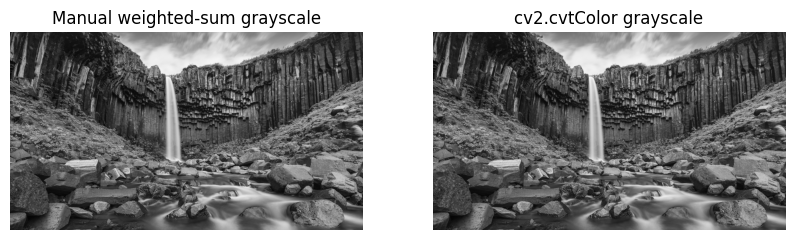

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "image.jpg"   

img_bgr = cv2.imread(image_path)
if img_bgr is None:
    raise FileNotFoundError(f"Image not found at: {image_path}")


img_rgb = img_bgr[:, :, ::-1].copy()  

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("RGB image (displayed using matplotlib)")
plt.axis('off')
plt.show()


rgb_float = img_rgb.astype(np.float32)   
R = rgb_float[:, :, 0]
G = rgb_float[:, :, 1]
B = rgb_float[:, :, 2]

gray_manual = 0.299 * R + 0.587 * G + 0.114 * B

gray_manual_uint8 = np.clip(gray_manual, 0, 255).astype(np.uint8)

gray_cv2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)  

# printing array shapes
print("Array shapes:")
print("  RGB image shape:", img_rgb.shape)               
print("  Manual grayscale shape:", gray_manual_uint8.shape) 
print("  cv2.cvtColor grayscale shape:", gray_cv2.shape)     

# printing few pixels 
H, W = gray_manual_uint8.shape
coords = [(0,0), (H//2, W//2), (H-1, W-1)]  
print("\nSample pixel values (format: (row,col)):")
for (r, c) in coords:
    
    rgb_val = tuple(int(x) for x in img_rgb[r, c, :])  
    manual_val = int(gray_manual_uint8[r, c])
    cv2_val = int(gray_cv2[r, c])
    print(f"  Pixel ({r},{c}): RGB={rgb_val} | manual_gray={manual_val} | cv2_gray={cv2_val}")

# comparing
diff = gray_manual.astype(np.int32) - gray_cv2.astype(np.int32)
abs_diff = np.abs(diff)
print("\nDifference stats (manual_gray - cv2_gray):")
print("  min difference:", float(abs_diff.min()))
print("  max difference:", float(abs_diff.max()))
print("  mean difference:", float(abs_diff.mean()))

# displaying side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_manual_uint8, cmap='gray')
plt.title("Manual weighted-sum grayscale")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_cv2, cmap='gray')
plt.title("cv2.cvtColor grayscale")
plt.axis('off')

plt.show()


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

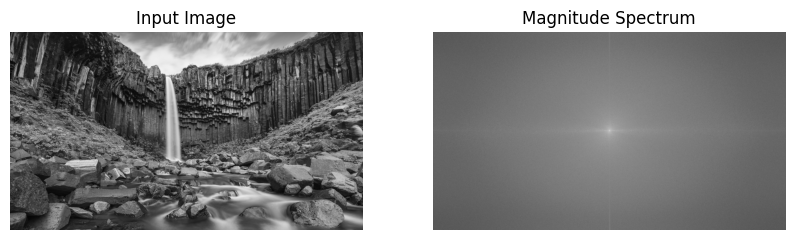

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg', 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude = np.abs(fshift)
phase = np.angle(fshift)

magnitude_spectrum = 20 * np.log(magnitude)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

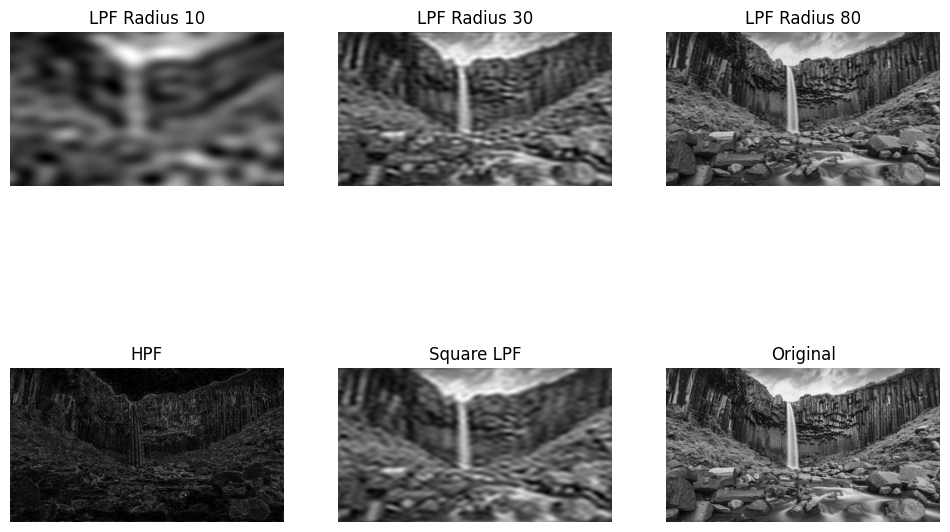

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg', 0)
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Part C1: 3 LPF Masks
radii = [10, 30, 80]
lpf_results = []

for r in radii:
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), r, 1, -1)
    
    fshift_masked = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_masked)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    lpf_results.append(img_back)

# Part C2: HPF Mask
mask_hpf = np.ones((rows, cols), np.uint8)
cv2.circle(mask_hpf, (ccol, crow), 30, 0, -1)

fshift_hpf = fshift * mask_hpf
f_ishift_hpf = np.fft.ifftshift(fshift_hpf)
img_hpf = np.fft.ifft2(f_ishift_hpf)
img_hpf = np.abs(img_hpf)

# Part C3: Square LPF Mask
mask_sq = np.zeros((rows, cols), np.uint8)
mask_sq[crow-25:crow+25, ccol-25:ccol+25] = 1

fshift_sq = fshift * mask_sq
f_ishift_sq = np.fft.ifftshift(fshift_sq)
img_sq = np.fft.ifft2(f_ishift_sq)
img_sq = np.abs(img_sq)

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(lpf_results[0], cmap='gray')
plt.title('LPF Radius 10')
plt.axis('off')

plt.subplot(232)
plt.imshow(lpf_results[1], cmap='gray')
plt.title('LPF Radius 30')
plt.axis('off')

plt.subplot(233)
plt.imshow(lpf_results[2], cmap='gray')
plt.title('LPF Radius 80')
plt.axis('off')

plt.subplot(234)
plt.imshow(img_hpf, cmap='gray')
plt.title('HPF')
plt.axis('off')

plt.subplot(235)
plt.imshow(img_sq, cmap='gray')
plt.title('Square LPF')
plt.axis('off')

plt.subplot(236)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

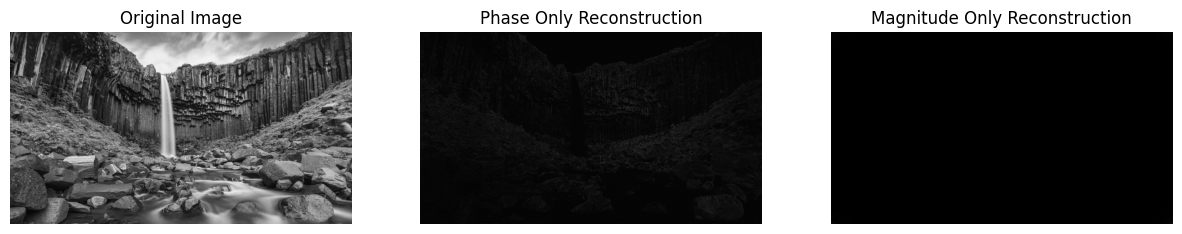

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg', 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# Part D1: Phase-only reconstruction
eps = 1e-8
phase_only_spectrum = fshift / (np.abs(fshift) + eps)
f_ishift_phase = np.fft.ifftshift(phase_only_spectrum)
img_phase = np.fft.ifft2(f_ishift_phase)
img_phase = np.abs(img_phase)

# Part D2: Magnitude-only reconstruction
mag_only_spectrum = np.abs(fshift)
f_ishift_mag = np.fft.ifftshift(mag_only_spectrum)
img_mag = np.fft.ifft2(f_ishift_mag)
img_mag = np.abs(img_mag)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_phase, cmap='gray')
plt.title('Phase Only Reconstruction')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_mag, cmap='gray')
plt.title('Magnitude Only Reconstruction')
plt.axis('off')

plt.show()

# Part D2 Comments:
# 1. Role of Logarithm: The Fourier coefficients have a very high dynamic range (huge difference between
#    low and high frequency values). The log transform compresses this range so we can see details
#    that would otherwise be invisible (too dark).
#
# 2. Difference: The 'Magnitude Spectrum' we display uses log scaling. The 'mag_only' variable here
#    uses the raw linear scale. Without the log, the raw magnitude just looks like a black image 
#    with a single white dot at the center because the DC component dominates.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

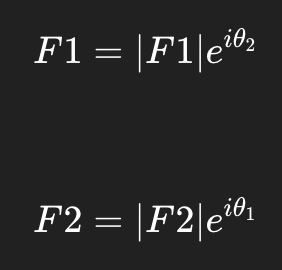

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

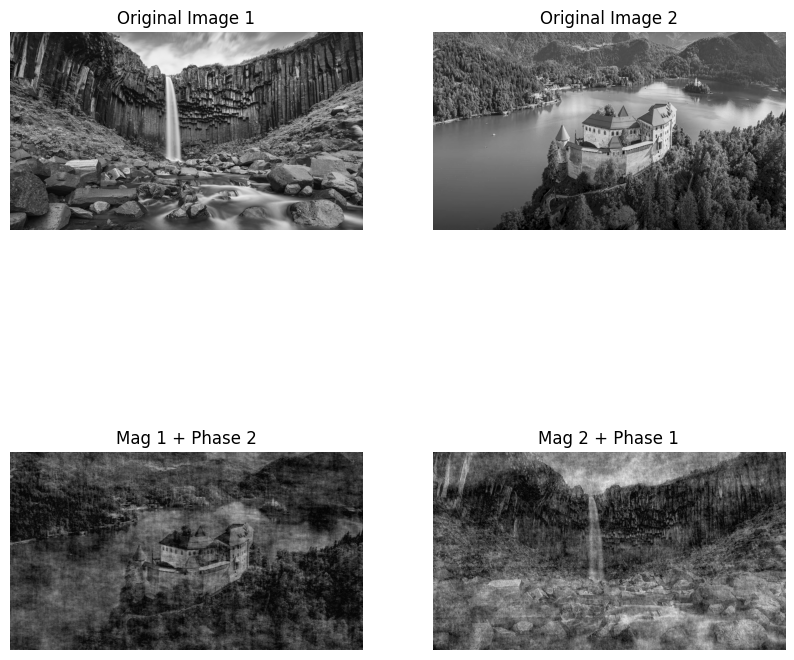

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load both images
img1 = cv2.imread('image.jpg', 0)
img2 = cv2.imread('image2.png', 0)

# Resize image2 to match image1 dimensions so we can combine them
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# FFT for Image 1
f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)
mag1 = np.abs(fshift1)
phase1 = np.angle(fshift1)

# FFT for Image 2
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
mag2 = np.abs(fshift2)
phase2 = np.angle(fshift2)

# Combine Magnitude of 1 with Phase of 2
combined_1 = mag1 * np.exp(1j * phase2)
f_ishift_1 = np.fft.ifftshift(combined_1)
img_result_1 = np.fft.ifft2(f_ishift_1)
img_result_1 = np.abs(img_result_1)

# Combine Magnitude of 2 with Phase of 1
combined_2 = mag2 * np.exp(1j * phase1)
f_ishift_2 = np.fft.ifftshift(combined_2)
img_result_2 = np.fft.ifft2(f_ishift_2)
img_result_2 = np.abs(img_result_2)

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(img1, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(223)
plt.imshow(img_result_1, cmap='gray')
plt.title('Mag 1 + Phase 2')
plt.axis('off')

plt.subplot(224)
plt.imshow(img_result_2, cmap='gray')
plt.title('Mag 2 + Phase 1')
plt.axis('off')

plt.show()

# Observation:
# Yes, the phase describes the structure (shapes and edges) of the image, while magnitude
# describes the texture or intensity values. The reconstructed images look structurally
# like the image that contributed the Phase.